# Instructions:
1. In this notebook, we will perform preprocessing and EDA on our three datasets.

2. To run the code, please upload form_spring_original.xlsx, twitter_original.csv and youtube_original.xlsx files provided under original_files.

#1. FormSpring data

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df_form_ori= pd.read_excel('form_spring_original.xlsx')
df_form_ori.head()

,BIO,DATE,LOCATION,USERID,TEXT,ASKER,ANSWER,CYBERBULLYWORD,SEVERITY,OTHER,WORKTIME,WORKERID
0,Gema Loves Preston. :D,20100731,Jackson Michigan,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,No,NaN,0,NaN,13,A8PXREHJMZJPZ
1,Gema Loves Preston. :D,20100731,Jackson Michigan,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,No,NaN,0,NaN,4,A2SV243JDONKOA
2,Gema Loves Preston. :D,20100731,Jackson Michigan,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,No,NaN,0,NaN,3,A3AECYZDPI2RZO
3,Hello.Im april I will NEVER change for you or ...,20100812,Somewhere over the rainbow!,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,NaN,No,NaN,0,NaN,48,A2XJXJLNB1F41H
4,Hello.Im april I will NEVER change for you or ...,20100812,Somewhere over the rainbow!,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,NaN,No,NaN,0,NaN,4,A1J6PX2YLIMQPH


In [4]:
df_form_ori.columns

Index(['BIO', 'DATE', 'LOCATION', 'USERID', 'TEXT', 'ASKER', 'ANSWER',
       'CYBERBULLYWORD', 'SEVERITY', 'OTHER', 'WORKTIME', 'WORKERID'],
      dtype='object')

In [6]:
df_form = df_form_ori[['TEXT','CYBERBULLYWORD','SEVERITY']] #taking only required columns

In [7]:
df_form

,TEXT,CYBERBULLYWORD,SEVERITY
0,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,0
1,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,0
2,Q: what&#039;s your favorite song? :D<br>A: I ...,NaN,0
3,Q: <3<br>A: </3 ? haha jk! <33,NaN,0
4,Q: <3<br>A: </3 ? haha jk! <33,NaN,0
...,...,...,...
40947,Q: yukk beer is disgusting. i can only drink i...,NaN,0
40948,Q: yukk beer is disgusting. i can only drink i...,NaN,0
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,2
40950,Q: if i told u den it would make it all the le...,NaN,0


In [8]:
df_form['SEVERITY'].unique()

array(['0', nan, '9', '1', '3', '5', '7', '4', '10', '2', '8', '6',
       'n/a0', 'o', '0`', '`0', 'N/a'], dtype=object)

##### Normally it should be in the range from 0-9. But we can observe that there are some other values too. We will now see few of the 'SEVERITY' which is not in the range of 0-9

In [9]:
unique_sev_list=['n/a0', 'o', '0`', '`0', 'N/a']
for i in unique_sev_list:
  print(df_form[df_form['SEVERITY']==i])

                                                   TEXT CYBERBULLYWORD  \
2121  Q: 3 things that your mom doesn&#039;t know ab...            NaN   

     SEVERITY  
2121     n/a0  
                                                   TEXT CYBERBULLYWORD  \
4714  Q: how often do you check on your formspring?<...            NaN   
9567            Q: do you cuss alot?<br>A: Indeed(: Lol            NaN   

     SEVERITY  
4714        o  
9567        o  
                                                   TEXT CYBERBULLYWORD  \
7128  Q: What&#039;s your favorite music video?<br>A...            NaN   

     SEVERITY  
7128       0`  
                                                   TEXT CYBERBULLYWORD  \
7780  Q: Would you ever have a long distance relatio...            NaN   

     SEVERITY  
7780       `0  
                TEXT CYBERBULLYWORD SEVERITY
9865  Q: :D<br>A: :)            NaN      N/a


##### It is observed that these unique 'SEVERITY' doesn't have any 'CYBERBULLYWORD' meaning it is doesn't contain any hate remark. Therefore we can mark these unique 'SEVERITY' as '0' indicatig it is non hate comment.

In [10]:
df_form["SEVERITY"] = df_form["SEVERITY"].replace(['n/a0', 'o', 'N/a', '`0', '0`'],0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_form.SEVERITY.unique()

array(['0', nan, '9', '1', '3', '5', '7', '4', '10', '2', '8', '6', 0],
      dtype=object)

In [12]:
df_form.isnull().sum()

TEXT                  0
CYBERBULLYWORD    36595
SEVERITY            667
dtype: int64

##### Here we can impute 'SEVERITY' as 1 for which 'CYBERBULLYWORD' is not null. Indicating it as hate speech

In [13]:
index_value=df_form[(df_form['SEVERITY'].isna()) & (df_form['CYBERBULLYWORD'].notna())].index

In [14]:
df_form.loc[index_value,'SEVERITY']=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [15]:
df_form[(df_form['SEVERITY'].isna()) & (df_form['CYBERBULLYWORD'].notna())]

,TEXT,CYBERBULLYWORD,SEVERITY


In [16]:
df_form['SEVERITY'].unique()

array(['0', nan, '9', '1', '3', '5', '7', '4', '10', '2', '8', '6', 1, 0],
      dtype=object)

In [17]:
df_form[(df_form['SEVERITY'].isna()) & (df_form['CYBERBULLYWORD'].isna())]

,TEXT,CYBERBULLYWORD,SEVERITY
23,Q: Are you a morning or night person?<br>A: Ni...,NaN,NaN
33,Q: Are you more of a talker or more of a liste...,NaN,NaN
57,Q: Chocolate or Vanilla?<br>A: Chocolate! Bahah!,NaN,NaN
67,Q: Do you believe in life after death?<br>A: Y...,NaN,NaN
73,Q: Do you believe there&#039;s intelligent lif...,NaN,NaN
...,...,...,...
11649,Q: What&#39;s the secret to happiness?<br>A: b...,NaN,NaN
11688,Q: Who is your favorite member of Short Stack?...,NaN,NaN
11689,Q: Who is your favorite member of Short Stack?...,NaN,NaN
11701,Q: whos your favoroute band?r A: ITS SHORT STA...,NaN,NaN


##### We can still observe null values in both 'SEVERITY' and 'CYBERBULLYWORD'. I can't assume both columns being null is non hate therefore I'll delete the rows where 'SEVERITY' is null

In [18]:
df_form.isnull().sum()

TEXT                  0
CYBERBULLYWORD    36595
SEVERITY            664
dtype: int64

In [19]:
df_form.dropna(subset=['SEVERITY'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
df_form.isnull().sum()

TEXT                  0
CYBERBULLYWORD    35931
SEVERITY              0
dtype: int64

##### Now it can be said that 'CYBERBULLYWORD' having null means 

In [21]:
df_form['CYBERBULLYWORD'] = df_form['CYBERBULLYWORD'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_form.isnull().sum()

TEXT              0
CYBERBULLYWORD    0
SEVERITY          0
dtype: int64

In [23]:
df_form

,TEXT,CYBERBULLYWORD,SEVERITY
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0
1,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0
2,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0
3,Q: <3<br>A: </3 ? haha jk! <33,0,0
4,Q: <3<br>A: </3 ? haha jk! <33,0,0
...,...,...,...
40947,Q: yukk beer is disgusting. i can only drink i...,0,0
40948,Q: yukk beer is disgusting. i can only drink i...,0,0
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,2
40950,Q: if i told u den it would make it all the le...,0,0


In [24]:
df_form.dtypes

TEXT              object
CYBERBULLYWORD    object
SEVERITY          object
dtype: object

In [25]:
df_form.rename(columns={'TEXT':'Text','CYBERBULLYWORD':'hate_words','SEVERITY':'Label'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
df_form['Label']=df_form['Label'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_form.dtypes

Text          object
hate_words    object
Label          int64
dtype: object

In [28]:
df_form["Label"] = df_form["Label"].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_form.columns

Index(['Text', 'hate_words', 'Label'], dtype='object')

In [30]:
df_form.shape[0] - df_form.duplicated().sum()

17027

In [31]:
df_form.drop_duplicates(keep='first',inplace=True) #removing duplicates

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
df_form.shape

(17027, 3)

In [33]:
df_form

,Text,hate_words,Label
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0
3,Q: <3<br>A: </3 ? haha jk! <33,0,0
6,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0
9,Q: (:<br>A: ;(,0,0
12,Q: ******************MEOWWW*******************...,0,0
...,...,...,...
40940,Q: Youu2019re awesome :] Give yourself a compl...,0,0
40943,Q: Yu play with yurself ?<br>A: all the time. ...,0,0
40946,Q: yukk beer is disgusting. i can only drink i...,0,0
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,1


In [34]:
def split_it(word):
    x= re.sub(r'http\S+', '', word)
    x = re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', x)
    if x :
      return(x)

In [35]:
df_form['hate_words']=df_form['hate_words'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_form['Text_clean']=df_form['Text'].apply(split_it)
df_form['hate_words_clean']=df_form['hate_words'].apply(split_it)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df_form['hate_words_clean']=df_form['hate_words_clean'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
def br_remove(word): 
    pattern=r'<br>'
    x = re.sub(pattern, ' ', word)
    if x :
      return(x)

In [39]:
df_form['Text_clean']=df_form['Text_clean'].apply(br_remove)
df_form['Text_clean'] = df_form['Text_clean'].str.replace(r'[^\w\s]+', '')

df_form['hate_words_clean']=df_form['hate_words_clean'].apply(br_remove)
df_form['hate_words_clean'] = df_form['hate_words_clean'].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWar

In [40]:
eng_stopwords = stopwords.words('english') 

df_form['Text_clean']=df_form['Text_clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in eng_stopwords))
df_form['hate_words_clean']=df_form['hate_words_clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in eng_stopwords))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df_form

,Text,hate_words,Label,Text_clean,hate_words_clean
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0
3,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0
6,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0
9,Q: (:<br>A: ;(,0,0,q a,0
12,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0
...,...,...,...,...,...
40940,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0
40943,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0
40946,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,1,q told u den would make less fun a would make ...,fake scaredyy cat


In [42]:
df_form['category']=df_form['Label'].map({0: 'non_hate_speech', 1: 'hate_speech'})

df_form

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,hate_words,Label,Text_clean,hate_words_clean,category
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech
3,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech
6,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech
9,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech
12,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0,non_hate_speech
...,...,...,...,...,...,...
40940,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0,non_hate_speech
40943,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0,non_hate_speech
40946,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0,non_hate_speech
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,1,q told u den would make less fun a would make ...,fake scaredyy cat,hate_speech


In [43]:
df_form.groupby('Label').count()

,Text,hate_words,Text_clean,hate_words_clean,category
Label,,,,,
0,13616,13616,13616,13616,13616
1,3411,3411,3411,3411,3411


In [44]:
non_hate_speech, hate_speech = np.bincount(df_form['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 17027
    non_hate_speech: 13616 (79.97% of total)

Examples:
    Total: 17027
    hate_speech: 3411 (20.03% of total)



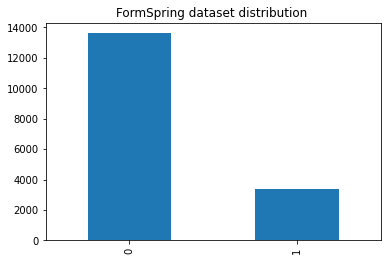

In [45]:
import matplotlib.pyplot as plt
plt.title("FormSpring dataset distribution ")
df_form.Label.value_counts().plot(kind='bar');

<class 'set'>


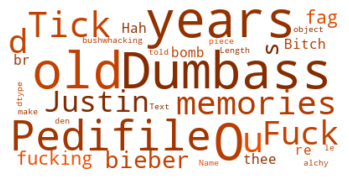

In [46]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("q")
stopwords.add("a")

print(type(STOPWORDS))

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((df_form.loc[df_form["category"]=="hate_speech"].Text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()



<class 'set'>


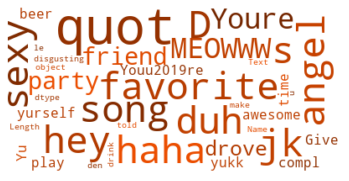

In [47]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("Q")
stopwords.add("A")
stopwords.add("br")

print(type(STOPWORDS))

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((df_form.loc[df_form["category"]=="non_hate_speech"].Text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()



In [48]:
df_form

,Text,hate_words,Label,Text_clean,hate_words_clean,category
0,Q: what&#039;s your favorite song? :D<br>A: I ...,0,0,q what039s favorite song d a i like many songs...,0,non_hate_speech
3,Q: <3<br>A: </3 ? haha jk! <33,0,0,q 3 a 3 haha jk 33,0,non_hate_speech
6,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,0,0,q quothey angel duh sexyquot a really thanks haha,0,non_hate_speech
9,Q: (:<br>A: ;(,0,0,q a,0,non_hate_speech
12,Q: ******************MEOWWW*******************...,0,0,q meowww a rawr,0,non_hate_speech
...,...,...,...,...,...,...
40940,Q: Youu2019re awesome :] Give yourself a compl...,0,0,q youu2019re awesome give compliment deserve a...,0,non_hate_speech
40943,Q: Yu play with yurself ?<br>A: all the time. ...,0,0,q yu play yurself a time sometimes day,0,non_hate_speech
40946,Q: yukk beer is disgusting. i can only drink i...,0,0,q yukk beer disgusting drink i039m already dru...,0,non_hate_speech
40949,Q: if i told u den it would make it all the le...,fake scaredyy cat,1,q told u den would make less fun a would make ...,fake scaredyy cat,hate_speech


In [ ]:
df_form.to_csv('form_spring_clean.csv',index=False)

#2. Youtube data

In [49]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
df_utube=pd.read_excel('youtube_data.xlsx')
df_utube

,index,UserIndex,Text,Cyberbullying words,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,NaN,0
1,1,X2,There are so many things that are incorrect wi...,NaN,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,NaN,0
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,NaN,0
...,...,...,...,...,...
3457,3464,X3465,She pretty I love this song I miss the old kel...,NaN,0
3458,3465,X3466,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,NaN,0
3459,3466,X3467,JR so cute EXO M Better I agree like yeah yeah...,NaN,0
3460,3467,X3468,! !,NaN,0


In [52]:
df_utube.drop(['index','UserIndex'],axis=1,inplace=True) #required columns

In [54]:
df_utube

,Text,Cyberbullying words,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,NaN,0
1,There are so many things that are incorrect wi...,NaN,0
2,3:26 hahah my boyfriend showed this song to me...,NaN,0
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,NaN,0
...,...,...,...
3457,She pretty I love this song I miss the old kel...,NaN,0
3458,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,NaN,0
3459,JR so cute EXO M Better I agree like yeah yeah...,NaN,0
3460,! !,NaN,0


In [55]:
df_utube.rename(columns={'Cyberbullying words':'hate_words','oh_label':'Label'},inplace=True)

In [56]:
df_utube.isnull().sum()

Text             0
hate_words    3153
Label            0
dtype: int64

In [57]:
df_utube['hate_words']=df_utube['hate_words'].fillna(0)

In [58]:
df_utube.isnull().sum()

Text          0
hate_words    0
Label         0
dtype: int64

In [59]:
def preprocessing(word):
  x = re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', word) #space
  pattern=r'<br>'
  x = re.sub(pattern, ' ', x)
  if x :
    return(x)

In [60]:
df_utube['Text']=df_utube['Text'].astype(str)
df_utube['hate_words']=df_utube['hate_words'].astype(str)

In [61]:
df_utube['Text_clean']=df_utube['Text'].apply(preprocessing)
df_utube['Text_clean'] = df_utube['Text_clean'].str.replace(r'[^\w\s]+', '')

df_utube['hate_words_clean']=df_utube['hate_words'].apply(preprocessing)
df_utube['hate_words_clean'] = df_utube['hate_words_clean'].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [62]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english') 
df_utube['Text_clean']=df_utube['Text_clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in eng_stopwords))
df_utube['hate_words_clean']=df_utube['hate_words_clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in eng_stopwords))

In [63]:
df_utube

,Text,hate_words,Label,Text_clean,hate_words_clean
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0
...,...,...,...,...,...
3457,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0
3458,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,0,statusonline im zxkillergirlzx im zxkillergirl...,0
3459,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0
3460,! !,0,0,,0


In [64]:
df_utube.duplicated().sum()

2

In [65]:
df_utube.drop_duplicates(keep='first',inplace=True) #removing duplicates

In [66]:
df_utube

,Text,hate_words,Label,Text_clean,hate_words_clean
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0
...,...,...,...,...,...
3457,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0
3458,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,0,statusonline im zxkillergirlzx im zxkillergirl...,0
3459,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0
3460,! !,0,0,,0


In [67]:
df_utube['category']=df_utube['Label'].map({0: 'non_hate_speech', 1: 'hate_speech'})
df_utube

,Text,hate_words,Label,Text_clean,hate_words_clean,category
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0,0,does n e bodyelse hear crazy ass screamin hoe ...,0,non_hate_speech
1,There are so many things that are incorrect wi...,0,0,there many things incorrect comment unbelievab...,0,non_hate_speech
2,3:26 hahah my boyfriend showed this song to me...,0,0,326 hahah boyfriend showed song i love me tooo...,0,non_hate_speech
3,dick beyonce fuck y a ass hole you are truely ...,"""""dick beyonce fuck y a ass hole you are truel...",1,dick beyonce fuck ass hole truely dog bitch ph...,dick beyonce fuck ass hole truely dog bitch ma...,hate_speech
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0,0,donghaetaemin kai a luhansehun bacon xd taemin...,0,non_hate_speech
...,...,...,...,...,...,...
3457,She pretty I love this song I miss the old kel...,0,0,she pretty i love song i miss old kelly ok rih...,0,non_hate_speech
3458,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0,0,statusonline im zxkillergirlzx im zxkillergirl...,0,non_hate_speech
3459,JR so cute EXO M Better I agree like yeah yeah...,0,0,jr cute exo m better i agree like yeah yeah ye...,0,non_hate_speech
3460,! !,0,0,,0,non_hate_speech


In [68]:
non_hate_speech, hate_speech = np.bincount(df_utube['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 3460
    non_hate_speech: 3144 (90.87% of total)

Examples:
    Total: 3460
    hate_speech: 316 (9.13% of total)



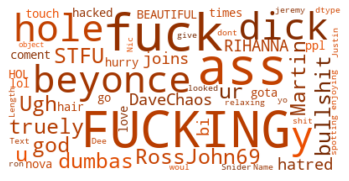

In [69]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

import random
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 20
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str((df_utube.loc[df_utube["category"]=="hate_speech"].Text)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()



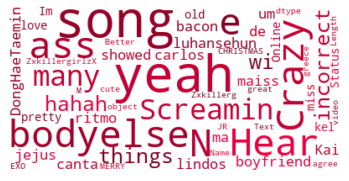

In [70]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


import random

def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_utube.loc[df_utube["category"]=="non_hate_speech"].Text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

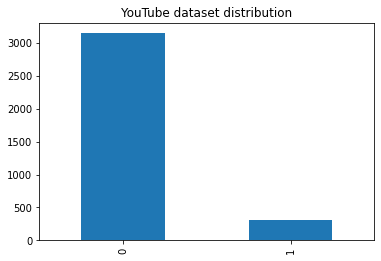

In [71]:
plt.title("YouTube dataset distribution")
df_utube.Label.value_counts().plot(kind='bar');

In [ ]:
df_utube.to_csv('utube_clean.csv',index=False)

#3. Twitter dataset

In [72]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
df_tw=pd.read_csv('twitter_data.csv')
df_tw

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [75]:
df_tw.drop(['index','id'],axis=1,inplace=True) #dropping unwanted columns

In [76]:
df_tw.isnull().sum()

Text          1
Annotation    3
oh_label      3
dtype: int64

In [77]:
df_tw.dtypes

Text           object
Annotation     object
oh_label      float64
dtype: object

In [78]:
df_tw[(df_tw['Annotation']=='none') & (df_tw['oh_label']!=0.0)]

,Text,Annotation,oh_label


In [79]:
df_tw['Annotation'].value_counts()

none      11501
sexism     3377
racism     1970
Name: Annotation, dtype: int64

In [80]:
df_tw.drop(['Annotation'],axis=1,inplace=True) 

In [81]:
df_tw.dtypes

Text         object
oh_label    float64
dtype: object

In [82]:
df_tw.isnull().sum()

Text        1
oh_label    3
dtype: int64

In [83]:
df_tw.shape

(16851, 2)

In [84]:
df_tw.dropna(axis=0,inplace=True)

In [85]:
df_tw.isnull().sum()

Text        0
oh_label    0
dtype: int64

In [86]:
df_tw.shape

(16848, 2)

In [87]:
df_tw.rename(columns={'oh_label':'Label'},inplace=True)

In [88]:
def preprocessing(word):
  x= re.sub(r'http\S+', '', word)
  x= re.sub(r'@([a-zA-Z0-9]+)','', x)
  x = re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', x) #space
  pattern=r'RT'
  x = re.sub(pattern, ' ', x)
  if x :
    return(x)

In [89]:
df_tw['Text']=df_tw['Text'].astype(str)

In [90]:
df_tw['Text_clean']=df_tw['Text'].apply(preprocessing)
df_tw['Text_clean'] = df_tw['Text_clean'].str.replace(r'[^\w\s]+', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [91]:
df_tw.isnull().sum()

Text           0
Label          0
Text_clean    24
dtype: int64

In [93]:
df_tw[df_tw['Text_clean'].isna()] #after preprocessing text which had link were removed

,Text,Label,Text_clean
1293,http://t.co/3hqI0L6cwU,0.0,None
2936,@AbuYigitAlCahrz,0.0,None
4610,http://t.co/bN7be6njVT,0.0,None
4790,http://t.co/BW9r97i4p0,0.0,None
6146,http://t.co/ggVGrdqOtN,0.0,None
7554,http://t.co/W1WmvCXAvm,0.0,None
8470,http://t.co/4xgRtUv57p,0.0,None
8711,http://t.co/NXgtqSlchG,0.0,None
8896,http://t.co/dALZL6ZuOV,0.0,None
9481,http://t.co/YnGATgiK5F,0.0,None


In [94]:
df_tw.dropna(axis=0,inplace=True) #dropped nulls
df_tw.isnull().sum()

Text          0
Label         0
Text_clean    0
dtype: int64

In [95]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english') 
df_tw['Text_clean']=df_tw['Text_clean'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in eng_stopwords))

In [96]:
df_tw.duplicated().sum()

0

In [97]:
df_tw

,Text,Label,Text_clean
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,now idiots claim people tried stop becoming te...
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly
4,#mkr No No No No No No,0.0,mkr no no no no no no
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home mkr
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkr pretty good dishes happy ok well i never e...
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,deconstructed lemon tart please go one season ...
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,you stupid talk blocked


In [98]:
df_tw['category']=df_tw['Label'].map({0: 'non_hate_speech', 1: 'hate_speech'})

df_tw

,Text,Label,Text_clean,category
0,@halalflaws @biebervalue @greenlinerzjm I read...,0.0,i read context no change meaning the history i...,non_hate_speech
1,@ShreyaBafna3 Now you idiots claim that people...,0.0,now idiots claim people tried stop becoming te...,non_hate_speech
2,"RT @Mooseoftorment Call me sexist, but when I ...",1.0,call sexist i go auto place i rather talk guy,hate_speech
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",1.0,wrong isis follows example mohammed quran exactly,hate_speech
4,#mkr No No No No No No,0.0,mkr no no no no no no,non_hate_speech
...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",0.0,feeling sorry girls safe kat andre going home mkr,non_hate_speech
16847,#MKR 'pretty good dishes we're happy with' - O...,0.0,mkr pretty good dishes happy ok well i never e...,non_hate_speech
16848,RT @colonelkickhead: Deconstructed lemon tart!...,0.0,deconstructed lemon tart please go one season ...,non_hate_speech
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,0.0,you stupid talk blocked,non_hate_speech


In [99]:
non_hate_speech, hate_speech = np.bincount(df_tw['Label'])
total = hate_speech + non_hate_speech
print('Examples:\n    Total: {}\n    non_hate_speech: {} ({:.2f}% of total)\n'.format(
    total, non_hate_speech, 100 *  non_hate_speech / total))
print('Examples:\n    Total: {}\n    hate_speech: {} ({:.2f}% of total)\n'.format(
    total, hate_speech, 100 * hate_speech / total))


Examples:
    Total: 16824
    non_hate_speech: 11477 (68.22% of total)

Examples:
    Total: 16824
    hate_speech: 5347 (31.78% of total)



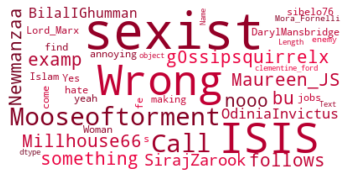

In [100]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")

import random
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_tw.loc[df_tw["category"]=="hate_speech"].Text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

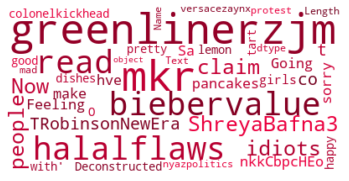

In [101]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("RT")
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_tw.loc[df_tw["category"]=="non_hate_speech"].Text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(color_func= random_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

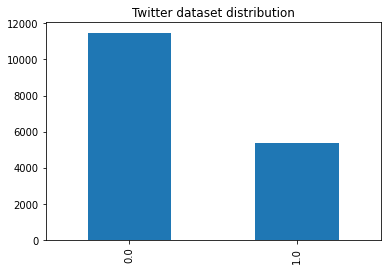

In [102]:
plt.title("Twitter dataset distribution")
df_tw.Label.value_counts().plot(kind='bar');

In [ ]:
df_tw.to_csv('twitter_clean.csv',index=False)